In [202]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [203]:
#taking data 

In [204]:
data=pd.read_csv('titanic_dataset.csv')

In [205]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [206]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [207]:
#droping index column and fixing passengerid as index

In [208]:
data=pd.read_csv('titanic_dataset.csv',index_col='PassengerId')

In [209]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [210]:
data.shape

(891, 11)

In [211]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [212]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [213]:
#filling missing values

In [214]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

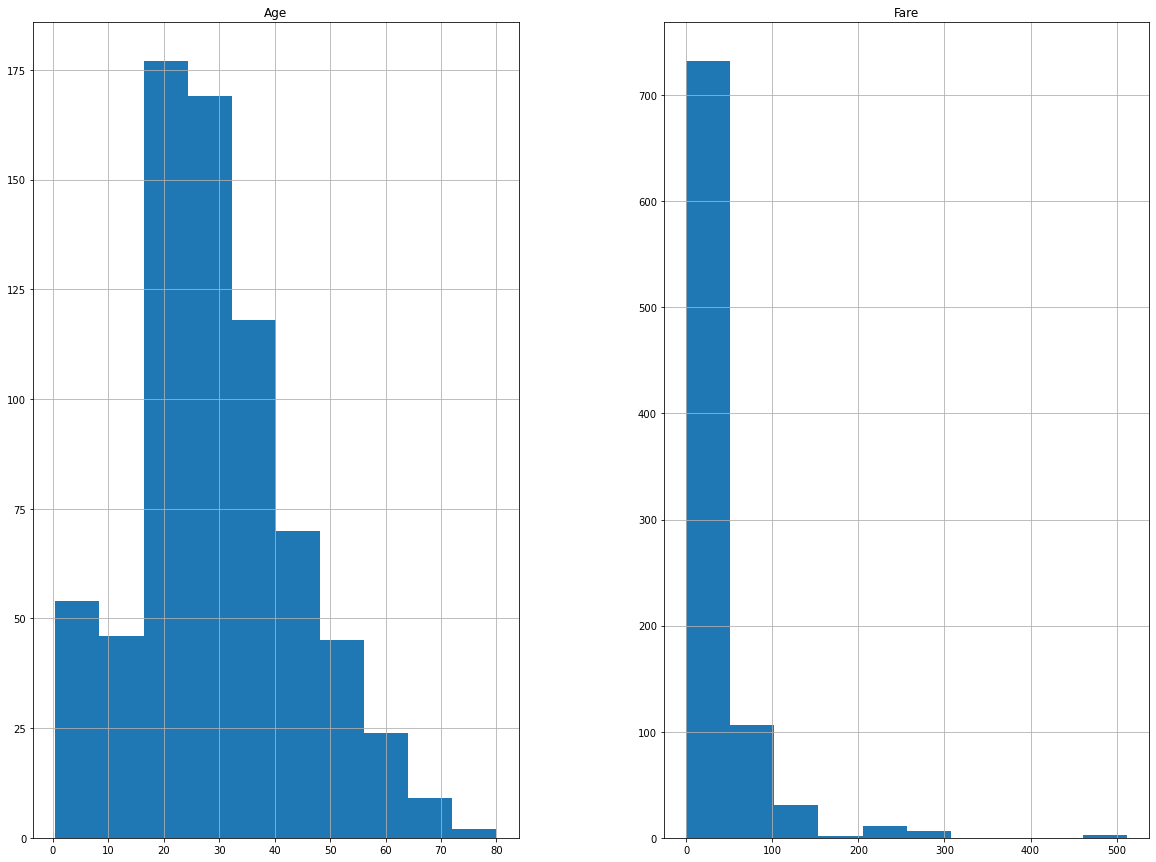

In [140]:
freqgraph=data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

In [216]:
#both are Right skewed values.

In [217]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [142]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [218]:
#Filling null values of Age and Fare by median. Because it is right skewed attributes

In [143]:
for i in ['Age','Fare']:
    data[i]=data[i].fillna(data[i].median())

In [144]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [219]:
#droping Cabin attribute because it has most of missing values

In [146]:
data.drop('Cabin',axis=1,inplace=True)

In [ ]:
#filling Embarked column with mode because it is a nominal attribute

In [147]:
data.Embarked.mode()

0    S
dtype: object

In [148]:
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])

In [149]:
data.Name.nunique()

891

In [ ]:
#Dropping Name column because it contains unique values most.

In [150]:
data.drop('Name',inplace=True,axis=1)

In [ ]:
#finding unique values in fare and removing those values

Text(0.5, 1.0, 'Boxplot for Fare')

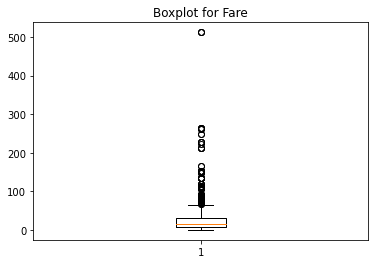

In [151]:
plt.boxplot(data['Fare'])
plt.title('Boxplot for Fare')

In [152]:
Q1=np.percentile(data['Fare'],25,interpolation='midpoint')
Q2=np.percentile(data['Fare'],50,interpolation='midpoint')
Q3=np.percentile(data['Fare'],75,interpolation='midpoint')
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)
print(up_lim)

-26.724
65.6344


In [153]:
outlier=[]
for x in data['Fare']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [154]:
outlier

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 146.5208,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 153.4625,
 135.6333,
 77.9583,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 75.25,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 263.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 79.2,
 78.2667,
 153.4625,
 77.9583,
 69.3,
 76.7292,
 73.5,
 113.275,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 71.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 80.0,
 83.1583,
 6

In [155]:
ind1=data['Fare']>up_lim 
index=data.loc[ind1].index

In [156]:
index

Int64Index([  2,  28,  32,  35,  53,  62,  63,  73,  89, 103,
            ...
            793, 803, 821, 830, 836, 847, 850, 857, 864, 880],
           dtype='int64', name='PassengerId', length=116)

In [157]:
data.drop(index,inplace=True)

Text(0.5, 1.0, 'Boxplot for Fare')

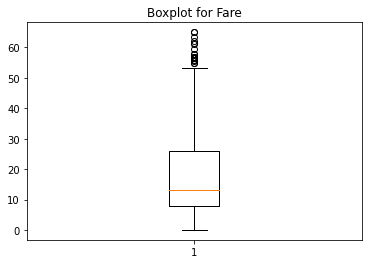

In [158]:
plt.boxplot(data['Fare'])
plt.title('Boxplot for Fare')

In [ ]:
#Checking Pclass has outliers but there is no outliers

Text(0.5, 1.0, 'Boxplot for Pclass')

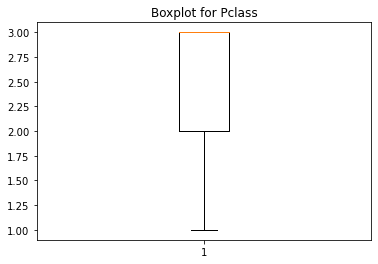

In [159]:
plt.boxplot(data['Pclass'])
plt.title('Boxplot for Pclass')

In [220]:
#removing outliers of SibSp coulumn

Text(0.5, 1.0, 'Boxplot for SibSp')

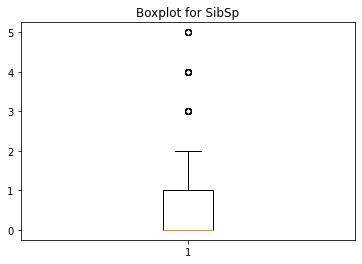

In [160]:
plt.boxplot(data['SibSp'])
plt.title('Boxplot for SibSp')

In [161]:
Q1=np.percentile(data['SibSp'],25,interpolation='midpoint')
Q2=np.percentile(data['SibSp'],50,interpolation='midpoint')
Q3=np.percentile(data['SibSp'],75,interpolation='midpoint')
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)
print(up_lim)

-1.5
2.5


In [162]:
outlier=[]
for x in data['SibSp']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [163]:
outlier

[3,
 4,
 3,
 4,
 5,
 3,
 4,
 5,
 3,
 4,
 4,
 4,
 3,
 4,
 3,
 4,
 4,
 4,
 4,
 3,
 5,
 3,
 5,
 3,
 4,
 4,
 3,
 3,
 5,
 4,
 3,
 4,
 4,
 3,
 4,
 4]

In [164]:
ind1=data['SibSp']>up_lim 
data.loc[ind1].index

Int64Index([  8,  17,  25,  51,  60,  64,  69,  72,  86, 120, 165, 172, 177,
            183, 230, 234, 262, 267, 279, 375, 387, 410, 481, 486, 542, 543,
            635, 643, 684, 687, 727, 788, 814, 820, 825, 851],
           dtype='int64', name='PassengerId')

In [165]:
data.drop([ 8,  17,  25,  51,  60,  64,  69,  72,  86, 120, 165, 172, 177,
            183, 230, 234, 262, 267, 279, 375, 387, 410, 481, 486, 542, 543,
            635, 643, 684, 687, 727, 788, 814, 820, 825, 851],inplace=True)

Text(0.5, 1.0, 'Boxplot for SibSp')

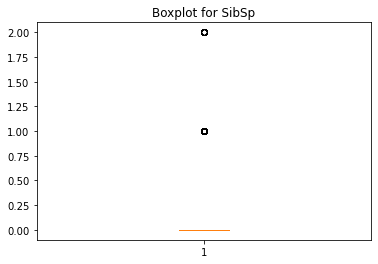

In [166]:
plt.boxplot(data['SibSp'])
plt.title('Boxplot for SibSp')

In [222]:
#Removing Outlier in Age column

Text(0.5, 1.0, 'Boxplot for Age')

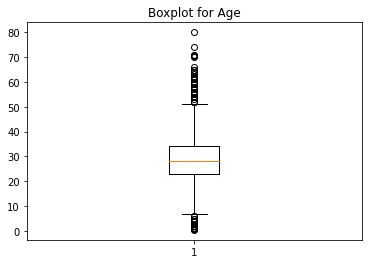

In [167]:
plt.boxplot(data['Age'])
plt.title('Boxplot for Age')

In [168]:
Q1=np.percentile(data['Age'],25,interpolation='midpoint')
Q2=np.percentile(data['Age'],50,interpolation='midpoint')
Q3=np.percentile(data['Age'],75,interpolation='midpoint')
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)
print(up_lim)

6.125
51.125


In [169]:
outlier=[]
for x in data['Age']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [170]:
outlier

[54.0,
 4.0,
 58.0,
 55.0,
 66.0,
 3.0,
 65.0,
 5.0,
 0.83,
 59.0,
 71.0,
 70.5,
 55.5,
 61.0,
 1.0,
 56.0,
 1.0,
 4.0,
 3.0,
 2.0,
 59.0,
 54.0,
 62.0,
 65.0,
 54.0,
 61.0,
 2.0,
 3.0,
 1.0,
 3.0,
 5.0,
 52.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 54.0,
 2.0,
 64.0,
 62.0,
 62.0,
 53.0,
 54.0,
 4.0,
 61.0,
 57.0,
 80.0,
 0.75,
 56.0,
 70.0,
 60.0,
 4.0,
 60.0,
 52.0,
 52.0,
 6.0,
 4.0,
 6.0,
 0.67,
 57.0,
 54.0,
 5.0,
 1.0,
 0.42,
 1.0,
 0.83,
 74.0,
 4.0]

In [172]:
ind1=data['Age']>up_lim 
ind1.append(data['Age']<low_lim) 
index=data.loc[ind1].index

In [173]:
index

Int64Index([  7,  12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 233, 250,
            253, 281, 318, 327, 450, 457, 468, 484, 488, 493, 494, 514, 546,
            556, 571, 572, 583, 626, 627, 631, 648, 673, 685, 695, 696, 715,
            773, 775, 852],
           dtype='int64', name='PassengerId')

In [174]:
data.drop(index,inplace=True)

Text(0.5, 1.0, 'Boxplot for Age')

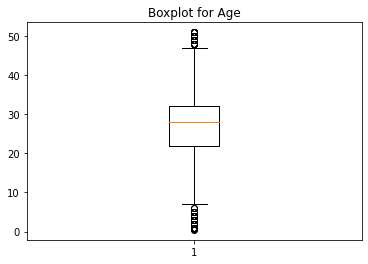

In [175]:
plt.boxplot(data['Age'])
plt.title('Boxplot for Age')

In [176]:
data.shape

(697, 9)

In [177]:
data.Embarked.nunique()

3

In [178]:
data.Ticket.nunique()

593

In [179]:
data.drop('Ticket',axis=1,inplace=True)

In [180]:
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [181]:
#encoding

In [182]:
data=pd.get_dummies(data)

In [183]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,0,1,0,0,1
3,1,3,26.0,0,0,7.9250,1,0,0,0,1
4,1,1,35.0,1,0,53.1000,1,0,0,0,1
5,0,3,35.0,0,0,8.0500,0,1,0,0,1
6,0,3,28.0,0,0,8.4583,0,1,0,1,0


In [ ]:
#Checking correlation

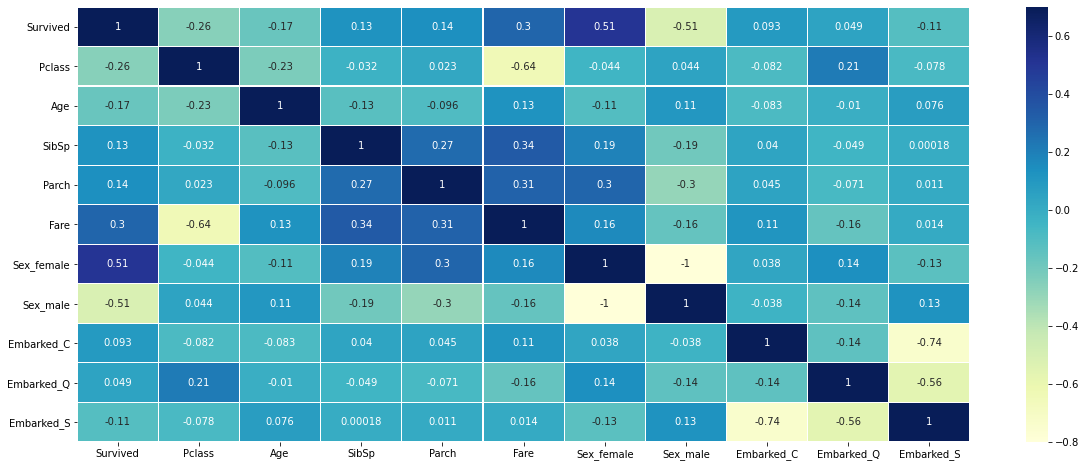

In [184]:
corrmatrix=data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=-0.8,vmax=0.7,annot=True,linewidth=0.2,cmap='YlGnBu')

In [185]:
#predicting survived

In [186]:
y=data['Survived']
x=data.drop('Survived',axis=1)

In [187]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [188]:
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
predictions=model.predict(x_test)

In [189]:
from sklearn.metrics import mean_squared_error
print('MSE is: ',mean_squared_error(y_test,predictions))

MSE is:  0.1690716658765256


In [190]:
from sklearn.metrics import r2_score
print('R squared value is :',r2_score(y_test,predictions))

R squared value is : 0.2813262521839296


In [191]:
x.describe()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000
mean,2.503587,27.777977,0.282640,0.296987,16.715972,0.317073,0.682927,0.156385,0.097561,0.746055
std,0.715430,9.873392,0.510409,0.765194,13.212679,0.465670,0.465670,0.363480,0.296933,0.435579
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.875000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,28.000000,0.000000,0.000000,10.500000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,3.000000,32.000000,1.000000,0.000000,23.450000,1.000000,1.000000,0.000000,0.000000,1.000000
max,3.000000,51.000000,2.000000,6.000000,65.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [192]:
type(x)

pandas.core.frame.DataFrame

In [223]:
#data scaling 

In [193]:
from sklearn import preprocessing

In [194]:
min_max=preprocessing.MinMaxScaler(feature_range=(0,1))

In [195]:
x=min_max.fit_transform(x)

In [196]:
x=pd.DataFrame(x)

In [197]:
x.describe()

,0,1,2,3,4,5,6,7,8,9
count,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000
mean,0.751793,0.540885,0.141320,0.049498,0.257169,0.317073,0.682927,0.156385,0.097561,0.746055
std,0.357715,0.195203,0.255204,0.127532,0.203272,0.465670,0.465670,0.363480,0.296933,0.435579
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.426651,0.000000,0.000000,0.121154,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.545275,0.000000,0.000000,0.161538,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,0.624357,0.500000,0.000000,0.360769,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [198]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
predictions=model.predict(x_test)
print('MSE is: ',mean_squared_error(y_test,predictions))
print('R squared value is :',r2_score(y_test,predictions))

MSE is:  0.1690716658765256
R squared value is : 0.2813262521839296


In [224]:
#Here R2 value and MSE before scaling and after is same. So minmax scaling is apt for this dataset.